<a href="https://colab.research.google.com/github/Ayush-mishra-0-0/ML/blob/main/Ds201_Assg_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-5

[Assignment link](https://cdn-uploads.piazza.com/paste/l6w1bx8r3hy6df/99562f551574094576c714e25e05eaa14695385a762ff409919c3ec131d8f778/Assignment_5_(2).pdf)  
# <FONT color="pink">QUESTION-1</FONT>  


## Part-A ▶ Calculate least squares estimator
Function to create calculate `least squares estimator`  
\text{Hello world}

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import numpy as np

def calculate_least_squares_estimator(x, y):
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sum((x - mean_x) ** 2)

    slope = numerator / denominator
    intercept = mean_y - slope * mean_x

    return slope, intercept



# Sample data
relative_humidity = np.array([46, 53, 29, 61, 36, 39, 47, 49, 52, 38, 55, 32, 57, 54, 44])
moisture_content = np.array([12, 15, 7, 17, 10, 11, 11, 12, 14, 9, 16, 8, 18, 14, 12])

slope, intercept = calculate_least_squares_estimator(relative_humidity, moisture_content)


print("Slope:", slope)
print("Intercept:", intercept)


Slope: 0.3232035618140402
Intercept: -2.5104576516877213


## Part-B ▶ Interpret regression line

In [3]:
def interpret_regression_line(slope, intercept):
    if slope > 0:
        interpretation = "There is a positive relationship between relative humidity and moisture content. As relative humidity increases, the moisture content of the substrates also tends to increase."
    elif slope < 0:
        interpretation = "There is a negative relationship between relative humidity and moisture content. As relative humidity increases, the moisture content of the substrates tends to decrease."
    else:
        interpretation = "There is no significant relationship between relative humidity and moisture content."

    return interpretation

In [4]:
interpretation = interpret_regression_line(slope, intercept)
print("Interpretation:", interpretation)

Interpretation: There is a positive relationship between relative humidity and moisture content. As relative humidity increases, the moisture content of the substrates also tends to increase.


## Part-C ▶ Predict Moisture Content

In [5]:
def predict_moisture_content(relative_humidity, slope, intercept):
    predicted_moisture_content = slope * relative_humidity + intercept
    return predicted_moisture_content

## Part-D ▶  Plot regression line

In [6]:
def plot_regression_line(relative_humidity, moisture_content, slope, intercept):
    fig = go.Figure()

    # Scatter plot
    fig.add_trace(go.Scatter(x=relative_humidity, y=moisture_content, mode='markers', name='Data Points'))

    # Regression line
    x_range = np.linspace(min(relative_humidity), max(relative_humidity), 100)
    y_range = slope * x_range + intercept
    fig.add_trace(go.Scatter(x=x_range, y=y_range, mode='lines', name='Regression Line'))

    fig.update_layout(
        title="Regression Analysis",
        xaxis_title="Relative Humidity (%)",
        yaxis_title="Moisture Content (%)",
        legend=dict(x=0, y=1, traceorder="normal"),
        margin=dict(l=0, r=0, t=30, b=0)
    )

    fig.show()
plot_regression_line(relative_humidity,moisture_content, slope, intercept)

## Part-E ▶ Assess_goodness_of_fit ⭐


In [7]:
def assess_goodness_of_fit(actual_moisture_content, predicted_moisture_content):
    mse = np.mean((actual_moisture_content - predicted_moisture_content) ** 2)
    return mse


In [8]:
predicted_moisture_content= relative_humidity*slope + intercept
assess_goodness_of_fit(moisture_content, predicted_moisture_content)

0.8721785048664319

## Part-F ▶ Compute Confidence Interval

In [9]:
from scipy.stats import t

def compute_confidence_interval(relative_humidity, slope, intercept, actual_moisture_content, confidence_level=0.95):
    predicted_moisture_content = predict_moisture_content(relative_humidity, slope, intercept)
    residual = actual_moisture_content - predicted_moisture_content
    dof = len(actual_moisture_content) - 2  # degrees of freedom
    std_error = np.sqrt(np.sum(residual ** 2) / dof)
    t_critical = t.ppf((1 + confidence_level) / 2, dof)
    margin_of_error = t_critical * std_error
    confidence_interval = predicted_moisture_content - margin_of_error, predicted_moisture_content + margin_of_error
    return confidence_interval


In [10]:
compute_confidence_interval(
    relative_humidity,
    slope,
    intercept,
    moisture_content,
    confidence_level=0.95
)

(array([10.18967865, 12.45210359,  4.6952181 , 15.03773208,  6.95764303,
         7.92725372, 10.51288221, 11.15928934, 12.12890002,  7.60405016,
        13.09851071,  5.66482879, 13.74491783, 12.77530715,  9.54327153]),
 array([14.52413373, 16.78655866,  9.02967318, 19.37218716, 11.29209811,
        12.2617088 , 14.84733729, 15.49374442, 16.4633551 , 11.93850524,
        17.43296579,  9.99928387, 18.07937291, 17.10976223, 13.87772661]))

In [11]:
def plot_regression_line_with_ci(relative_humidity, moisture_content, slope, intercept, confidence_interval):
    fig = go.Figure()

    # Scatter plot
    fig.add_trace(go.Scatter(x=relative_humidity, y=moisture_content, mode='markers', name='Data Points'))

    # Regression line
    x_range = np.linspace(min(relative_humidity), max(relative_humidity), 100)
    y_range = slope * x_range + intercept
    fig.add_trace(go.Scatter(x=x_range, y=y_range, mode='lines', name='Regression Line'))

    # Confidence interval
    lower_bound, upper_bound = confidence_interval
    fig.add_trace(go.Scatter(x=np.concatenate([x_range, x_range[::-1]]),
                             y=np.concatenate([lower_bound, upper_bound[::-1]]),
                             fill='toself',
                             fillcolor='rgba(0,100,80,0.2)',
                             line=dict(color='rgba(255,255,255,0)'),
                             name='Confidence Interval'))

    fig.update_layout(
        title="Regression Analysis with Confidence Interval",
        xaxis_title="Relative Humidity (%)",
        yaxis_title="Moisture Content (%)",
        legend=dict(x=0, y=1, traceorder="normal"),
        margin=dict(l=0, r=0, t=30, b=0)
    )

    fig.show()

# Sample data
relative_humidity = np.array([46, 53, 29, 61, 36, 39, 47, 49, 52, 38, 55, 32, 57, 54, 44])
moisture_content = np.array([12, 15, 7, 17, 10, 11, 11, 12, 14, 9, 16, 8, 18, 14, 12])

slope, intercept = calculate_least_squares_estimator(relative_humidity, moisture_content)
confidence_interval = compute_confidence_interval(relative_humidity, slope, intercept, moisture_content)

plot_regression_line_with_ci(relative_humidity, moisture_content, slope, intercept, confidence_interval)


# Question-2

## Part-A ▶ Calculate_slope_intercept

In [12]:
def calculate_slope_intercept(study_time, exam_scores):
    mean_study_time = np.mean(study_time)
    mean_exam_scores = np.mean(exam_scores)

    numerator = np.sum((study_time - mean_study_time) * (exam_scores - mean_exam_scores))
    denominator = np.sum((study_time - mean_study_time) ** 2)

    slope = numerator / denominator
    intercept = mean_exam_scores - slope * mean_study_time

    return slope, intercept

In [13]:
study_time = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])
exam_scores = np.array([70, 75, 80, 85, 90, 92, 94, 96, 98, 100, 101, 102, 103, 104, 105])

slope, intercept = calculate_slope_intercept(study_time, exam_scores)
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 1.1696428571428572
Intercept: 74.28571428571428


## Part-B ▶ Visualize the Plot between Study time and exam_scores

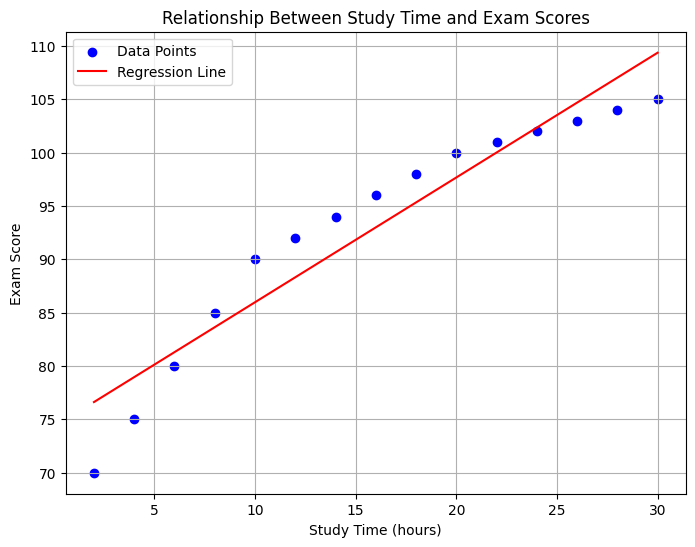

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(study_time, exam_scores, color='blue', label='Data Points')

x_range = np.linspace(min(study_time), max(study_time), 100)
y_range = slope * x_range + intercept
plt.plot(x_range, y_range, color='red', label='Regression Line')

plt.title('Relationship Between Study Time and Exam Scores')
plt.xlabel('Study Time (hours)')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)

plt.show()

## Part-C ▶ Predict exam score

In [15]:
def predict_exam_score(study_time, slope, intercept):
    predicted_exam_score = slope * study_time + intercept
    return predicted_exam_score

In [17]:
predict_exam_score(study_time, slope, intercept)

array([ 76.625     ,  78.96428571,  81.30357143,  83.64285714,
        85.98214286,  88.32142857,  90.66071429,  93.        ,
        95.33928571,  97.67857143, 100.01785714, 102.35714286,
       104.69642857, 107.03571429, 109.375     ])